<a href="https://colab.research.google.com/github/Hanzlazafar1/DIP_assignment_02/blob/main/facemaskdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [6]:
dataset_path = '/content/drive/MyDrive/data'

In [7]:
# Image data generator for training and validation (with augmentation)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% validation
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [8]:
# Load training and validation data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 1101 images belonging to 2 classes.


In [9]:

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 275 images belonging to 2 classes.


In [10]:

# Define CNN model
model = Sequential()
model.add(Conv2D(200, (3, 3), input_shape=(100, 100, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 classes: with_mask and without_mask

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.weights.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='auto',
                             save_weights_only=True)


In [13]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 608s 17s/step - accuracy: 0.5151 - loss: 1.1147 - val_accuracy: 0.8691 - val_loss: 0.5002
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 270ms/step - accuracy: 0.8722 - loss: 0.3846 - val_accuracy: 0.9164 - val_loss: 0.2410
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 277ms/step - accuracy: 0.9510 - loss: 0.1540 - val_accuracy: 0.9418 - val_loss: 0.1463
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.9558 - loss: 0.1291 - val_accuracy: 0.9455 - val_loss: 0.1294
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step - accuracy: 0.9645 - loss: 0.1006 - val_accuracy: 0.9564 - val_loss: 0.1239
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step - accuracy: 0.9695 - loss: 0.0944 - val_accuracy: 0.9600 - val_loss: 0.1175
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step - accuracy: 0.9589 - loss: 0.1314 - val_accuracy: 0.9636 - val_loss: 0.1030
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 247ms/step - accuracy: 0.9769 - loss: 0.0833 - val_accuracy:

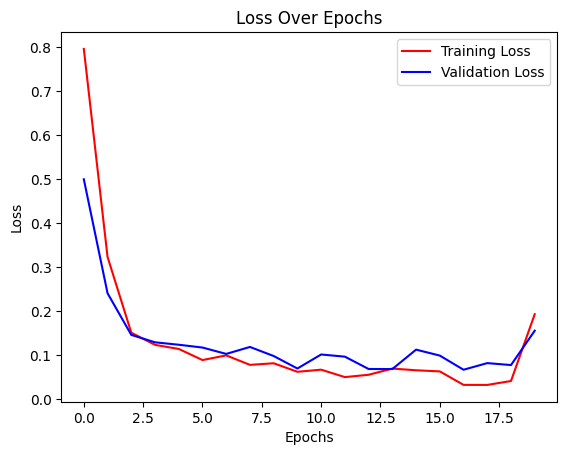

In [14]:
# Plot loss
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

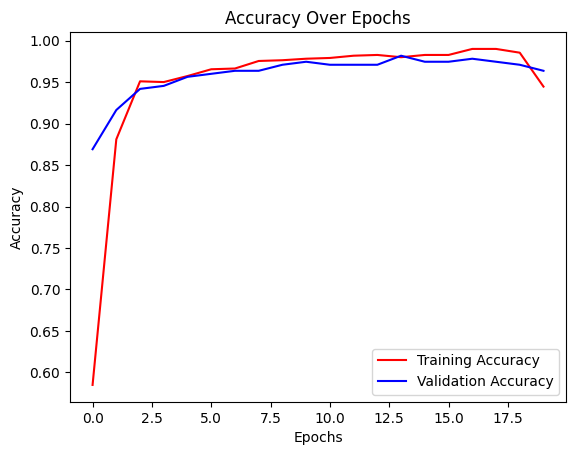

In [15]:
# Plot accuracy
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

In [16]:
# Evaluate model on validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"\nFinal Validation Accuracy: {val_accuracy * 100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.9650 - loss: 0.1461

Final Validation Accuracy: 96.00%


In [16]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Load image (use same size as training images)
img_path = '/content/drive/MyDrive/data/with_mask/0-with-mask.jpg'  # 🔁 Change to your image path
img = load_img(img_path, target_size=(100, 100))    # Resize same as model input

# Convert to array and normalize
img_array = img_to_array(img) / 255.0               # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension

# Predict using the model
prediction = model.predict(img_array)

# Get predicted class index
predicted_class_index = np.argmax(prediction)

# Get class labels (same order as training generator)
class_labels = list(train_generator.class_indices.keys())

# Output prediction
print(f"Predicted Class: {class_labels[predicted_class_index]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
Predicted Class: with_mask


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


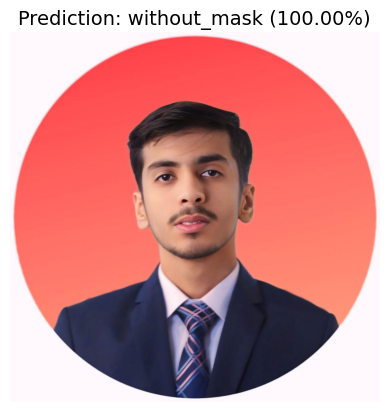

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# Load image
img_path = '/content/WhatsApp Image 2025-03-08 at 02.09.01_48a8b1d3.jpg'
img = load_img(img_path, target_size=(100, 100))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
confidence = np.max(prediction)

# Class labels (from your generator)
class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[predicted_index]

# Show image with prediction
plt.imshow(load_img(img_path))  # original image
plt.axis('off')
plt.title(f"Prediction: {predicted_class} ({confidence * 100:.2f}%)", fontsize=14)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


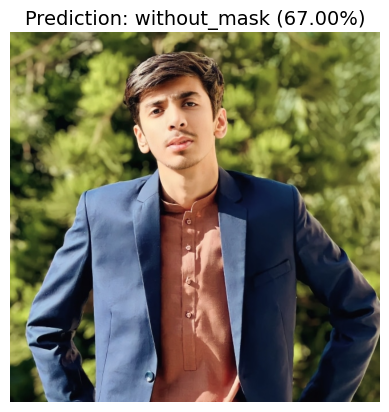

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# Load image
img_path = '/content/IMG_20240102_230454_218.jpg'
img = load_img(img_path, target_size=(100, 100))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
confidence = np.max(prediction)

# Class labels (from your generator)
class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[predicted_index]

# Show image with prediction
plt.imshow(load_img(img_path))  # original image
plt.axis('off')
plt.title(f"Prediction: {predicted_class} ({confidence * 100:.2f}%)", fontsize=14)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


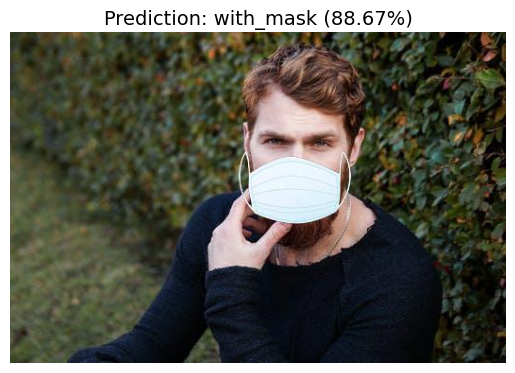

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# Load image
img_path = '/content/0-with-mask.jpg'
img = load_img(img_path, target_size=(100, 100))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
confidence = np.max(prediction)

# Class labels (from your generator)
class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[predicted_index]

# Show image with prediction
plt.imshow(load_img(img_path))  # original image
plt.axis('off')
plt.title(f"Prediction: {predicted_class} ({confidence * 100:.2f}%)", fontsize=14)
plt.show()

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Reset the validation generator and make predictions
val_generator.reset()
predictions = model.predict(val_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# True class labels
true_classes = val_generator.classes

# Class label names
class_labels = list(val_generator.class_indices.keys())


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step


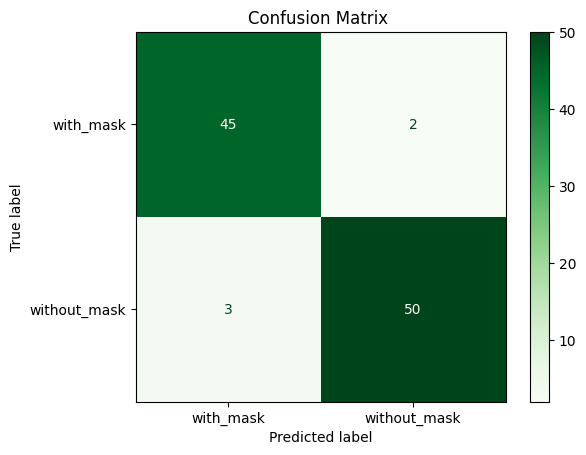

In [2]:
# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [3]:
from sklearn.metrics import classification_report

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

   with_mask       0.94      0.96      0.95        47
without_mask       0.96      0.94      0.95        53

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

